<a href="https://colab.research.google.com/github/jx-dohwan/Deep_Learning_from_Scratch_study/blob/main/CH4_%EC%8B%A0%EA%B2%BD%EB%A7%9D_%ED%95%99%EC%8A%B5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CH4_신경망 학습
> 여기서 학습은 훈련 데이터로부터 가중치 매개변수의 최적값을 자동으로 획득하는 것을 뜻한다. 이번 장에서는 신경망이 학습할 수 있도록 해주는 지표인 손실함수를 소개한다. 이 손실함수의 결괏값을 가장 작게 만드는 가중치 매개변수를 찾는 것이 학습의 목표이다. 그럼으로 손실함수의 값을 작게 만드는 기법인 경사법을 소개한다.
- 손실함수
  - 오차제곱합
  - 교차엔트로피 오차

## 1. 손실함수

### 1) 오차제곱합
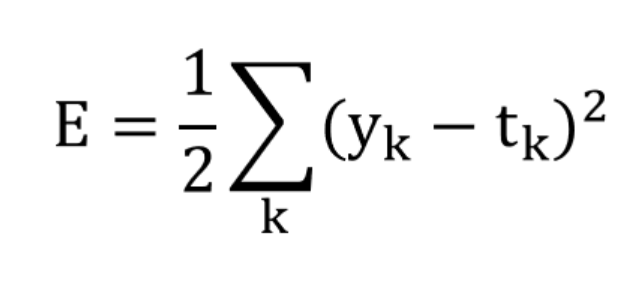

- yk는 신경망의 출력(신경망이 추정한 값)
- tk는 정답 레이블
- k는 데이터의 차원의 수
> 오차제곱합은 각 원소의 출력과 정답의 차를 제곱한 후 그 총합을 구한다.

In [1]:
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]

In [2]:
import numpy as np
def sum_squares_error(y, t):
  return 0.5 * np.sum((y-t)**2)

In [3]:
sum_squares_error(np.array(y), np.array(t))

0.09750000000000003

In [5]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0,  0.0]
sum_squares_error(np.array(y), np.array(t))

0.5975

### 2) 교차엔트로피

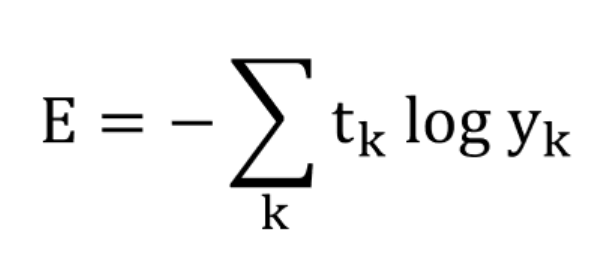

- log는 밑이 e인 자연로그(loge)이다.
- yk는 신경망의 출력
- tk는 정답 레이블이며 정답에 해당하는 인덱스의 원소만 1이고 나머지는 0이다.(원핫인코딩)
> 실질적으로 정답일 때의 추정의 자연로그를 계산하는 식이 된다. 즉, 교체 엔트로피 오차는 정답일 때의 출력이 전체 값을 정하게 된다. 좀 더 쉽게 말하면 정답일때의 출력이 작아질수록 오차는 커지게 된다.
> 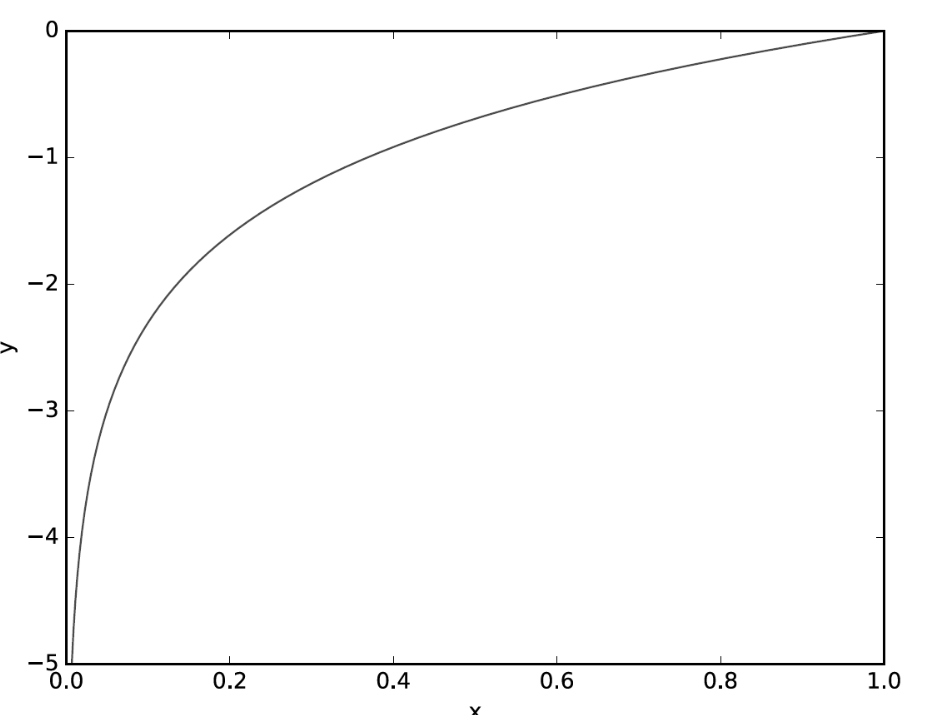

In [6]:
def cross_entropy_error(y, t):
  delta = 1e-7
  return -np.sum(t*np.log(y+delta))

In [7]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0 ]
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

0.510825457099338

In [8]:
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]
cross_entropy_error(np.array(y), np.array(t))

2.302584092994546

### 3) 미니배치학습
- 훈련 데이터가 10개 있으면 그로부터 계산한 100개의 손실함수 값들의 합을 지표로 삼는 것이다.

### 4) 배치용 교차엔트로피 오차 구현하기

##### 원-핫 인코딩 데이터(정답 레이블)

In [11]:
def cross_entropy_error(y, t): # y는 신경만 출력, t는 정답 레이블
  if y.ndim == 1: # y가 1차원이라면 즉, 데이터 하나당 교차 엔트로피 오차를 구하는 경우 reshape 함수로 데이터 형상을 ㅏㅂ꿔준다.
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(t * np.log(y + 1e-7)) / batch_size # 배치의 크기로 나눠 정규화하고 이미지 1장당 평균 교차 엔트로피 오차를 계산한다.

##### 숫자 레이블 

In [12]:
def cross_entropy_error(y, t):
  if y.ndim == 1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)

  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size

> 신경만 학습에서는 최적의 매개변수(가중치와 편향)를 참색할 때 손실함수의 값을 가능한 한 작게 하는 매겨밴수값을 찾는다. <br> 이때 매개변수의 미분(정확히는 기울기)을 계산하고, 그 미분 값을 단서로 매개변수의 값을 서서히 갱신하는 과정을 반복한다. <br> 만약 이 이분값이 음수면 그 가중치 매개변수를 양의 방향으로 변화시켜 손실함수의 값을 줄일 수 있다. 반대로 미분 값이 양수면 가중치 매개변수를 음의 방향으로 변환시켜 손실함수의 값을 줄일 수 있다. 그러나 미분값이 0이면 가중치 매개변수를 어느 쪽으로 움직여도 손실 함수의 값은 줄어들지 않고 갱신은 거기서 멈추게 된다.

> 정확도를 지표로 삼지 않는 이유는 미분값이 대부분 장소에서 0이 되어 매개변수를 갱신할 수 없기 때문이다. 이유는 정확도가 50%라면 가중치 매개변수의 값을 조금 바꾼다고 해도 50% 그대로 유지된다. 즉 매개변수를 약간만 조정해서는 정확도가 개선도지 않고 일정하게 위지된다. 그리고 50%, 51%처럼 불연속적인 띄엄띄엄한 값으로 바뀌게 된다.

> 반대로 손시함수를 지표로 삼으면 매개변수의 값이 조금 변하면 그에 반응하여 손실 함수의 값도 연속적으로 변화한다. 어느 정소라도 기울기가 0이 되지 않는것이 신경망을 올바르게 학습할 수 있는 것이다.

## 2. 수치미분
> 경사법에서는 기울기 값을 기준으로 나아갈 방향을 정한다. 기울기란 무엇인지, 어떤 성질이 있는지 설명하고자 한다.

### 1) 미분
- 한순간의 변화량을 표시한 것이다. 
  - 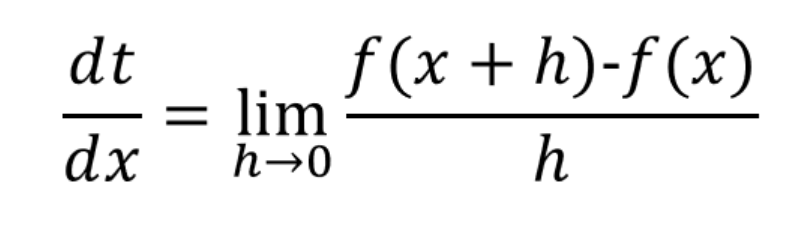

- 좌변은 f(x)의 x에 대한 미분(x에 대한 f(x)의 변화량)을 나타내는 기호
- 결국, x의 작은변화가 함수 f(x)를 얼마나 변화시키느냐를 의미한ㄷ.
- 이때 시간의 작은 변화, 즉 시간을 뜻하는 h를 한없이 0에 가까벡 한다는 의미를 lim h->0으로 나타ㅐㄴ다.

In [13]:
# 나쁜 구현의 예
def numerical_diff(f, x):
  h = 1e-50
  return (f(x+h) - f(x))/h

In [14]:
np.float32(1e-50)

0.0

- 이 방식은 반올림 오차 문제를 일으킨다.
- 1e-4 정도의 값을 사용하면 좋은 결과를 얻는다고 알려져 있다.
- 수치 미분에는 오차가 포함된다. 이 오차를 줄이기 위해(x+h)와 (x-h)일 때의 함수 f의 차분을 계산하는 방법을 쓰기도 한다.
- 이 차분은 x를 중심으로 그 전후의 차분을 계산한다는 의미에서 중심차분 혹은 중앙 차분이라고 한다. 
- (x+h) 와 x의 차분은 전방차분이라고 한다.

In [15]:
def numerical_diff(f, x):
  h = 1e-4
  return (f(x+h) - f(x-h)) / (2*h) # 차분식이다. 